L'euristica naive funziona in questo modo:<br>
- finché ci sono ancora terminali:<br>
    -> estrai un nodo terminale<br>
    -> collegalo con shortest path al nodo precedente, se durante il cammino ti ricolleghi ad un percorso che esiste già smetti di inserire archi (altrimenti si crea un ciclo)<br>

Osservazioni: in questo caso bisogna controllare se nell'aggiungere un nodo si sono inglobati altri nodi di steiner nel percorso

In [38]:
import os
import pandas as pd
import time
from functions import *
import sys

In [39]:
#EURISTICA naive
def naive(grafo):
    start_time = time.time()
    steiner_tree = Graph()
    terminals = (grafo.get_steiner_vertices()).copy()
    
    #Estraggo il primo dei terminali e lo inserisco nel risultato
    first_node = terminals.pop(0)
    steiner_tree.add_vertex(first_node)
    steiner_tree.add_steiner(first_node)
    
    #Finchè ho dei nodi terminali da inserire nell'albero
    while len(terminals) > 0:
        nuovo_terminal = terminals.pop(0) #estraggo il primo nodo terminale dalla lista
        steiner_tree.add_steiner(nuovo_terminal)

        path = grafo.find_shortest_path(first_node, nuovo_terminal)
        
        #Aggiungo il percorso al grafo di steiner
        for edge in path:
            #Controllo se sto inserendo anche altri nodi terminal per caso
            if edge[0] in terminals:
                terminals.remove(edge[0])
                steiner_tree.add_steiner(edge[0])
            if edge[1] in terminals:
                terminals.remove(edge[1])
                steiner_tree.add_steiner(edge[1])  
            
            ''' 
            Se a questo punto ho già un percorso, mi fermo altrimenti creo un ciclo
            Esempio: Ho l'albero 18 -- 4 -- 5 -- 8
            Per collegarmi al terminal 18 dal nodo 34 ho il percorso: 34 -- 10 -- 8 -- 3  -- 18 : questo creerebbe un ciclo
            Una volta raggiunto l'8 mi blocco e rimane: 34 -- 10 -- 8 
            '''
            if edge[1] in steiner_tree.get_vertices():
                steiner_tree.add_edge(edge[0],edge[1],path[edge]) #Aggiungo comunque l'ultimo arco per ricollegarmi al percorso già esistente
                break
            steiner_tree.add_edge(edge[0],edge[1],path[edge])
                 
        first_node = nuovo_terminal #Aggiorno il nodo a cui ricollegarci
        
    end_time = time.time()
    execution_time = end_time - start_time
    
    #Controllo ammissibilità:
    if not(check_admissibility(grafo, steiner_tree)):
        print("NON è STATO PASSATO IL CONTROLLO DELL'AMMISSIBILITA'")
        sys.exit(0)
        
    
    return steiner_tree, execution_time
    

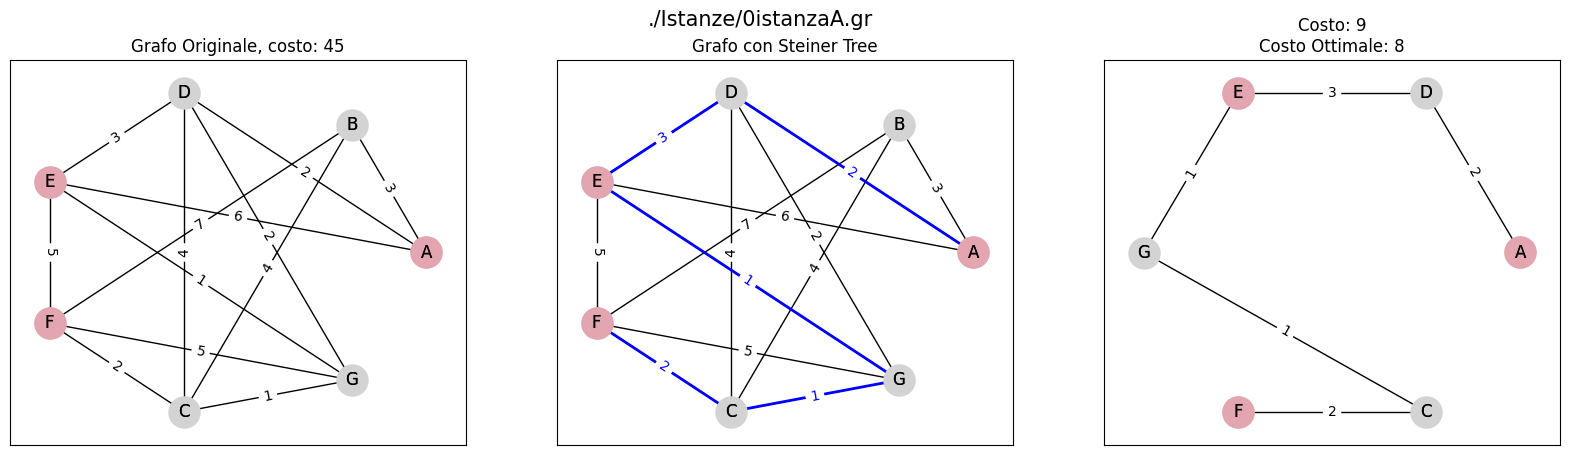

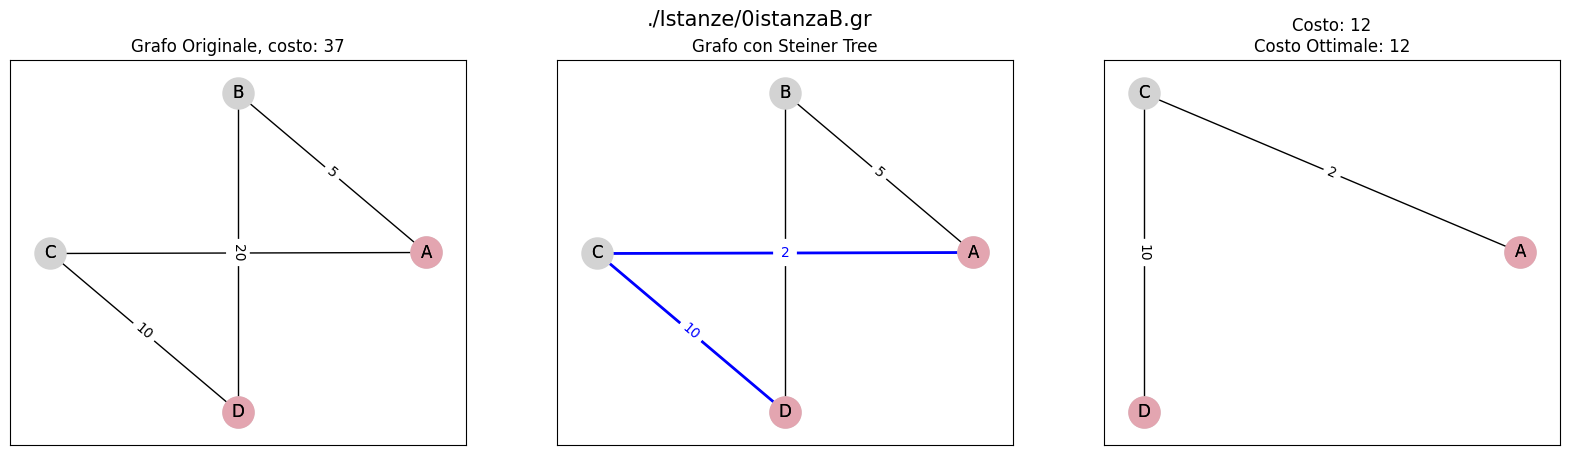

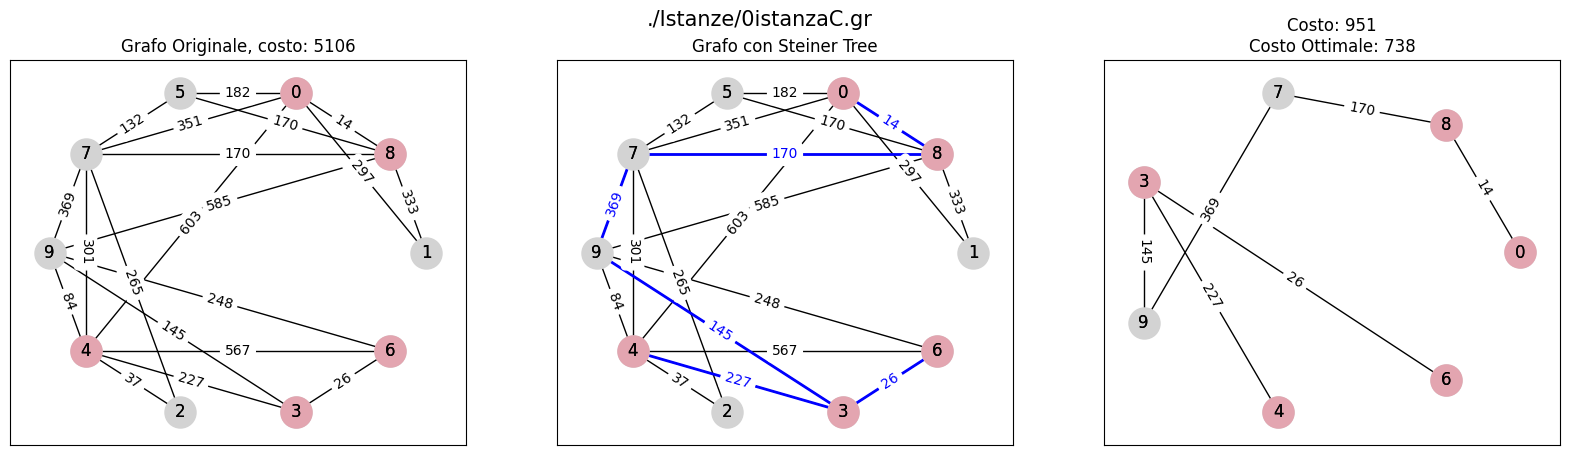

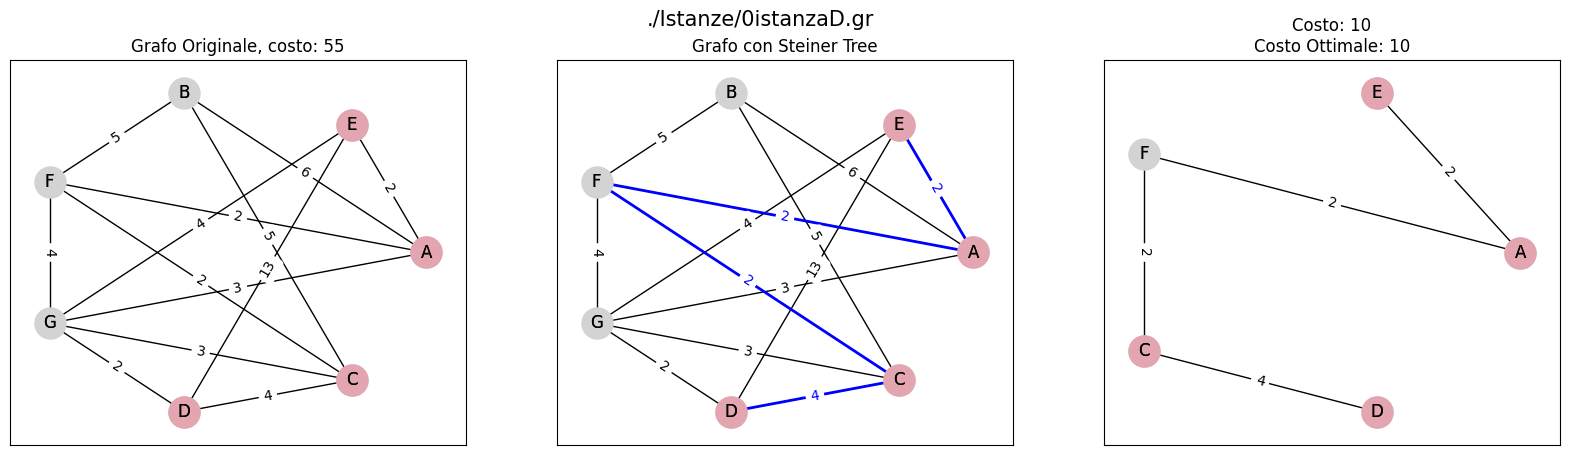

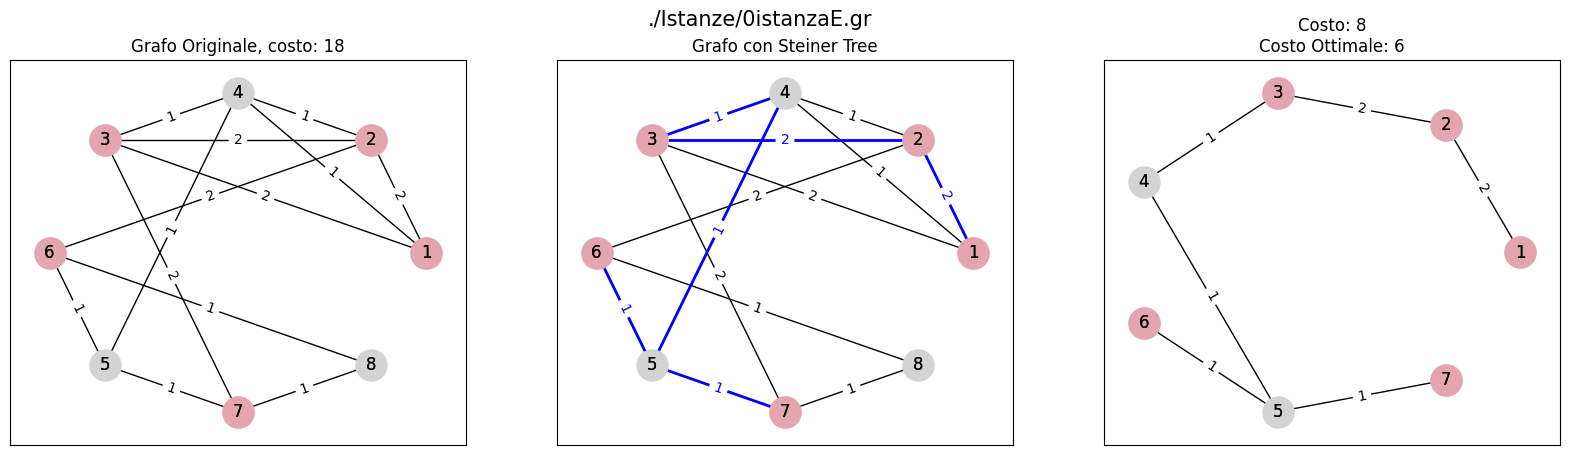

In [40]:
#PROVE DEI RISULTATI OTTENUTI applicando l'euristica1: shortest path

#Lettura delle istanze da file ed esecuzione
file_path = "./Istanze/0istanzaA.gr" 
grafo = create_graph(file_path)
steiner_tree, timeS = naive(grafo)
draw_row_graph(file_path,grafo,steiner_tree)


file_path = "./Istanze/0istanzaB.gr" 
grafo1 = create_graph(file_path)
steiner_tree1, timeS = naive(grafo1)
draw_row_graph(file_path,grafo1,steiner_tree1)

file_path = "./Istanze/0istanzaC.gr" 
grafo2 = create_graph(file_path)
steiner_tree2, timeS = naive(grafo2)
draw_row_graph(file_path,grafo2,steiner_tree2)

file_path = "./Istanze/0istanzaD.gr" 
grafo3 = create_graph(file_path)
steiner_tree3, timeS = naive(grafo3)
draw_row_graph(file_path,grafo3,steiner_tree3)

file_path = "./Istanze/0istanzaE.gr" 
grafoE = create_graph(file_path)
steiner_treeE, timeS = naive(grafoE)
draw_row_graph(file_path,grafoE,steiner_treeE)



In [41]:
#Valutazione su tutte le istanze presenti
data = {
    'Nome': [],
    'Num_Vertici': [],
    'Num_Terminals': [],
    'Num_Archi': [],
    'Num_Vertici_Steiner': [],
    'Num_Archi_Steiner': [],
    'Costo_Steiner':[],
    'Costo_Ottimale':[],
    'Differenza_ottimo':[],
    'Time(s)':[]
}

directory = './Istanze/'

# Iterate over all files in the directory
for filename in sorted(os.listdir(directory)):
    #Prendo i nomi dei file
    file_path = os.path.join(directory, filename)
    #print(file_path)
    #Calcolo i valori
    grafo = create_graph(file_path)
    steiner_tree, timeS = naive(grafo)
    
    #Aggiungo i risultati
    data['Nome'].append(filename.split('.')[0])
    data['Num_Vertici'].append(grafo.get_num_vertices())
    data['Num_Terminals'].append(grafo.get_num_vertices_steiner())
    data['Num_Archi'].append(grafo.get_num_edges())
    data['Num_Vertici_Steiner'].append(steiner_tree.get_num_vertices())
    data['Num_Archi_Steiner'].append(steiner_tree.get_num_edges())
    costo_albero_minimo = steiner_tree.calculate_cost()
    ottimo = grafo.get_optimal_cost_steiner_tree()
    difference = int(costo_albero_minimo) - int(ottimo)
    data['Costo_Steiner'].append(costo_albero_minimo)
    data['Costo_Ottimale'].append(ottimo)
    data['Differenza_ottimo'].append(difference)
    data['Time(s)'].append(timeS)
    

df = pd.DataFrame(data).set_index('Nome')
df = df.sort_index()
pd.set_option('display.max_columns', None)  # Imposta la larghezza massima delle colonne a None
pd.set_option('display.expand_frame_repr', False) 

# Print the table
print(df)

              Num_Vertici  Num_Terminals  Num_Archi  Num_Vertici_Steiner  Num_Archi_Steiner  Costo_Steiner Costo_Ottimale  Differenza_ottimo   Time(s)
Nome                                                                                                                                                  
0istanzaA               7              3         13                    6                  5              9              8                  1  0.000353
0istanzaB               4              2          4                    3                  2             12             12                  0  0.000056
0istanzaC              10              5         20                    7                  6            951            738                213  0.000253
0istanzaD               7              4         13                    5                  4             10             10                  0  0.000152
0istanzaE               8              5         13                    7                  6   